# Analysis of the Git history of the Linux kernel

## Introduction
With this worksheet, you will learn the first steps with Jupyter, Python, pandas and matplotlib using a practical example: The analysis of the development history of the Linux kernel.

The complete and detailed mini-tutorial can also be found on my blog at https://www.feststelltaste.de/mini-tutorial-git-log-analyse-mit-python-und-pandas/.

## Task
* We want to find out
 * who are the TOP 10 authors with the most commits (=code changes)
 * at what hour of the day most commits are made.
 
As starting point, we have a record in a file that lists the time stamp and the author of the code change for each commit:

```
timestamp,author
2017-12-31 14:47:43,Linus Torvalds
2017-12-31 13:13:56,Linus Torvalds
2017-12-31 13:03:05,Linus Torvalds
2017-12-31 12:30:34,Linus Torvalds
2017-12-31 12:29:02,Linus Torvalds
```

This data was basically generated by `git` (https://git-scm.com) from the GitHub repository https://github.com/torvalds/linux/ (and simplified a little for the mini-tutorial...).

Let's get to know the tools we use!

## Jupyter
Jupyter offers us code and documentation in executable **cells**.

##### Code execution

1. select the next cell (mouse click or arrow keys).
1. execute the cell with a `Ctrl`+`Enter`. 
1. move the cell again with `Shift`+`Enter`. What's the difference between the output of results?

In [1]:
"Hello World"

'Hello World'

##### Create new cell
1. if it hasn't happened yet, select this cell.
1. enter **command mode**, selectable with `ESC` key.
1. create a **new cell** after this text with the `b` key. 
1. change the **cell type** to "Markdown" with key `m`.
1. switch to **edit mode** with `Enter` *(note the color to the left of the cell, which turns green instead of blue)*.
1. write a text, which you then "execute" with `Ctrl` + `Enter`.

This is a text

## Python
We look at very basic functions:

- variable assignments
- value range accesses
- method calls

#### Assign text to a variable
1. **assign** the text **value** "Hello World" to the **variable** `text` by using the syntax `<variable> = <value>`. 
1. type the variable `text` in the next line and execute the cell.

In [2]:
text = "Hello World"
text

'Hello World'

##### Access values
1. access the first letter in `text` with `[0]`.

In [3]:
text[0]

'H'

##### Select last value
1. access the last letter in `text` with `[-1]`.

In [4]:
text[-1]

'd'

##### Select value ranges
1. access a range of `text` with the **slice** `[2:5]`.

In [5]:
text[2:4]

'll'

#### Auto completion
1. append a `.` to `text` and look at the functions with the `Tab` key.
1. execute the **method** `upper()` (Tip: Type a `u` in the function overview).

In [6]:
text.upper()

'HELLO WORLD'

#### Interactive documentation
1. select the `split` function of `text`.
1. Press `Shift`+`Tab`.
1. press `Shift`+`Tab` twice in quick succession.
1. press `Shift`+`Tab` four times in quick succession (and then `ESC` to hide) 
1. parts with `split` split the text into `text` exactly once using the `l`s.

In [7]:
text.split("l",maxsplit=1)

['He', 'lo World']

## Pandas

### Import data

#### Load a module
1. import the module `pandas` with `import <module> as <abbreviation>` as abbreviated `pd`
1. in the next line,  attached a `?` to `pd` and execute the cell to get some information about `pd`.

In [8]:
import pandas as pd
pd?

#### Import file
1. use the `read_csv` method to read the data from the location in `PATH`.
1. write the result into the variable `git_log`.
1. display the first five entries (= commits aka code changes) in `git_log` with the `head()` method.

In [9]:
PATH = "https://github.com/feststelltaste/software-analytics/raw/master/demos/dataset/git_demo_timestamp_linux.gz"

git_log = pd.read_csv(PATH)
git_log.head()

,timestamp,author
0,2017-12-31 14:47:43,Linus Torvalds
1,2017-12-31 13:13:56,Linus Torvalds
2,2017-12-31 13:03:05,Linus Torvalds
3,2017-12-31 12:30:34,Linus Torvalds
4,2017-12-31 12:29:02,Linus Torvalds


#### Getting to know data
1. call `info()` on `git_log`.

In [10]:
git_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723214 entries, 0 to 723213
Data columns (total 2 columns):
timestamp    723214 non-null object
author       723213 non-null object
dtypes: object(2)
memory usage: 11.0+ MB


We see that `git_log` is 
* a **DataFrame** that consists of
 * two columns (so-called **Series**). 
* We also see that we have
 * 723214 entries in the column `timestamp` (=commit time)
 * but only 723213 for `author` (=programmer).

#### Detect data errors
1. access the column `author` with the notation `git_log.author`.
1. Calculate missing authors with by appending the `isnull()` method.
1. write the result in `missing`.
1. print the first five entries of `missing`.

In [11]:
missing = git_log.author.isnull()
missing.head()

0    False
1    False
2    False
3    False
4    False
Name: author, dtype: bool

#### Select data
1. select all missing authors in `git_log` with the **selector** `[<Series>]` and the data in the Series `missing`.

In [12]:
git_log[missing]

,timestamp,author
719027,2005-07-01 23:27:00,NaN


### Aggregate data
#### Top 10 authors
1. count the number of commits per author of the column `author` in `git_log` with the method `value_counts()`.
1. list only the TOP 10 most frequently occurring authors.
1. save the result in the variable `top10`.
1. list the result in `top10`.

In [13]:
top10 = git_log.author.value_counts().head(10)
top10

Linus Torvalds           24259
David S. Miller           9563
Mark Brown                6917
Takashi Iwai              6293
Al Viro                   6064
H Hartley Sweeten         5942
Ingo Molnar               5462
Mauro Carvalho Chehab     5384
Arnd Bergmann             5305
Greg Kroah-Hartman        4687
Name: author, dtype: int64

## matplotlib
### Visualization

#### Plot diagram
1. tell Jupyter with `%matplotlib inline` to display generated graphics directly in the notebook.
1. create a diagram with `plot()` on the S
eries `top10`.

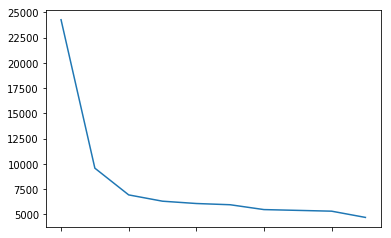

In [14]:
%matplotlib inline
top10.plot()

#### Create a bar chart
1. call the `bar()` sub-method of `plot` for the data in `git_log`.

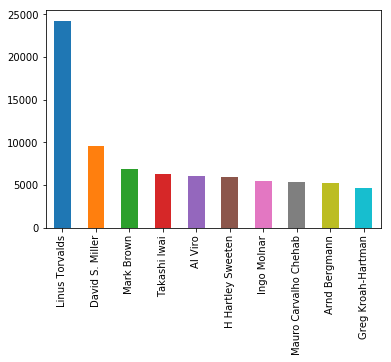

In [15]:
top10.plot.bar()

#### Improve the  output
1. add a `;` to the call above and re-execute it. * What has changed? *

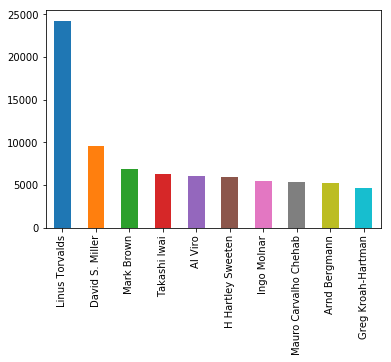

In [16]:
top10.plot.bar();

#### Create a pie chart
1. call the `pie()` sub-method of `plot` for the data in `top10`.

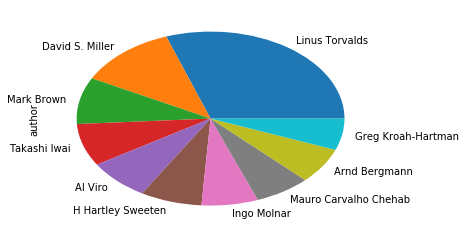

In [17]:
top10.plot.pie();

#### Create a beautiful pie chart
1. create another pie chart, this time directly with `plot()` of the Series `top10` and with the following parameters:  
 * `kind="pie"`
 * `figsize=[7,7]`
 * `title="Top 10 authors"`
 * `label=""`  

Tip: Use auto completion.

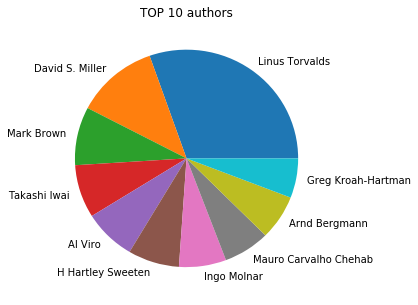

In [18]:
top10.plot(
    kind='pie',
    title="TOP 10 authors",
    label="",
    figsize=[5,5]);

## Time series analysis
##### View timestamp column
1. display the first five entries of the series `timestamp`.

In [19]:
git_log.timestamp.head()

0    2017-12-31 14:47:43
1    2017-12-31 13:13:56
2    2017-12-31 13:03:05
3    2017-12-31 12:30:34
4    2017-12-31 12:29:02
Name: timestamp, dtype: object

#### Data type conversion
1. use the pandas function `pd.to_datetime` to convert the column `timestamp` into a real date data type.
1. write the result into the new variable `ts` (abbreviation for "timestamp").
1. output the first five entries.

In [20]:
ts = pd.to_datetime(git_log.timestamp)
ts.head()

0   2017-12-31 14:47:43
1   2017-12-31 13:13:56
2   2017-12-31 13:03:05
3   2017-12-31 12:30:34
4   2017-12-31 12:29:02
Name: timestamp, dtype: datetime64[ns]

#### Working with time data
1. access the date object `dt` of the variable `ts`.
1. display the hours of the `hour` property of the `dt` object.
1. print out the first five entries.

In [21]:
ts.dt.hour.head()

0    14
1    13
2    13
3    12
4    12
Name: timestamp, dtype: int64

##### Find out favorite commit times
1. count the number of commits per hour.
 1. here, switch the sorting with the parameter `sort=False` off.
1. save the result in `commits_per_hour`.

In [22]:
commits_per_hour = ts.dt.hour.value_counts(sort=False)
commits_per_hour.head()

0    19533
1    15044
2    10420
3     7000
4     6068
Name: timestamp, dtype: int64

#### End result
1. plot a bar chart of the hourly commit count.

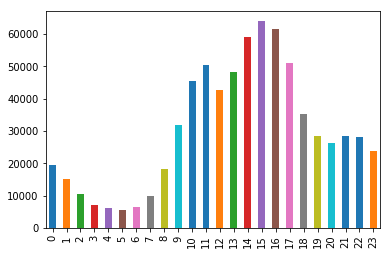

In [23]:
commits_per_hour.plot.bar();

Well done! Congratulations!  

## What's missing
You have now learned some basics about pandas. This will get us a long way in our daily work. The other important topics that are still missing are:
* reading in complicated, semi-structured data structures
* cleansing of poor data
* merging different data sources with `merge` and `join`
* grouping of similar data using `groupby`.
* transforming of DataFrames with `pivot_table`.  

## Summary
I hope that this mini-tutorial will show you the potential of data analysis using Jupyter, Python, pandas and matplotlib!  

I am looking forward to your comments and feedback!  

   
## Contact
 

**Markus Harrer**  
Blog: https://www.feststelltaste.de  
Mail:  <a href="mailto:talk@markusharrer.de">talk@markusharrer.de</a>    
Twitter: [@feststelltaste](https://twitter.com/feststelltaste)  
Consulting and training: http://markusharrer.de